Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import umap.umap_ as umap

pd.set_option("display.max_colwidth", 200)

Download dataset

In [2]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

print('Number of documents:', len(documents))

dataset.target_names

Number of documents: 11314


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Clean dataset

In [3]:
news_df = pd.DataFrame({'document':documents})

# removing everything except alphabets`
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")

# removing short words
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# make all text lowercase
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

Remove stop words

In [4]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

# tokenization
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())

# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

[nltk_data] Downloading package stopwords to /home/sean/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Create document-term matrix

In [47]:
vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])

X.shape # check shape of the document-term matrix

(11314, 1000)

Model Topics

In [48]:
# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

topic_term_matrix = svd_model.components_
document_topic_matrix = svd_model.transform(X)

print(topic_term_matrix.shape)
print(document_topic_matrix.shape)

(20, 1000)
(11314, 20)


Print top words in each topic

In [7]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0], end=' ')
    print('\n')

Topic 0: 
like know people think good time thanks 

Topic 1: 
thanks windows card drive mail file advance 

Topic 2: 
game team year games season players good 

Topic 3: 
drive scsi disk hard card drives problem 

Topic 4: 
windows file window files program using problem 

Topic 5: 
government chip mail space information encryption data 

Topic 6: 
like bike know chip sounds looks look 

Topic 7: 
card sale video offer monitor price jesus 

Topic 8: 
know card chip video government people clipper 

Topic 9: 
good know time bike jesus problem work 

Topic 10: 
think chip good thanks clipper need encryption 

Topic 11: 
thanks right problem good bike time window 

Topic 12: 
good people windows know file sale files 

Topic 13: 
space think know nasa problem year israel 

Topic 14: 
space good card people time nasa thanks 

Topic 15: 
people problem window time game want bike 

Topic 16: 
time bike right windows file need really 

Topic 17: 
time problem file think israel long mail 

Topi

Visualize Topics

/home/sean/projects/python/sentiment_analyzer/venv/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../venv/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/sean/projects/python/sentiment_analyzer/venv/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../venv/lib/pytho

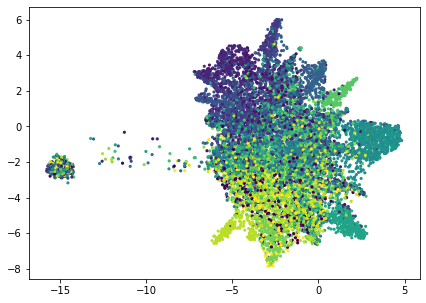

In [8]:
X_topics = svd_model.fit_transform(X)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = dataset.target,
s = 10, # size
edgecolor='none'
)
plt.show()